In [1]:
import pandas as pd
import numpy as np
import functools as ft
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
COLORS = [
    '#00B0F0',
    '#FF0000'
]

In [3]:
dfs = []
for x in range(2004, 2024):
    y = pd.read_csv(f'data/{x}.csv', sep='\t').dropna(thresh=2).reset_index(drop=True)[['Country', f'{x-1}', f'{x}', f'{x+1}']].rename({
        f'{x-1}': f'{x-1}_in_{x}',
        f'{x}': f'{x}_in_{x}',
        f'{x+1}': f'{x+1}_in_{x}',
    }, axis=1)
    y[f'{x-1}_in_{x}'] = y[f'{x-1}_in_{x}'].astype(str).str.replace(' ', '').str.replace('--', 'NaN').astype(float)
    y[f'{x}_in_{x}'] = y[f'{x}_in_{x}'].astype(str).str.replace(' ', '').str.replace('--', 'NaN').astype(float)
    y[f'{x+1}_in_{x}'] = y[f'{x+1}_in_{x}'].astype(str).str.replace(' ', '').str.replace('--', 'NaN').astype(float)
    dfs.append(y)
df = ft.reduce(lambda left, right: pd.merge(left, right, on='Country'), dfs)
df.dropna(inplace=True)
df.head()

,Country,2003_in_2004,2004_in_2004,2005_in_2004,2004_in_2005,2005_in_2005,2006_in_2005,2005_in_2006,2006_in_2006,2007_in_2006,...,2021_in_2020,2020_in_2021,2021_in_2021,2022_in_2021,2021_in_2022,2022_in_2022,2023_in_2022,2022_in_2023,2023_in_2023,2024_in_2023
0,Antigua and Barbuda,2.5,1.0,0.5,4.1,2.4,2.6,5.0,7.1,3.9,...,4.701,-20.031,0.965,7.019,5.270,6.021,5.629,8.459,5.592,5.417
1,Argentina,8.8,7.0,4.0,9.0,7.5,4.2,9.2,8.0,6.0,...,4.889,-9.905,7.500,2.465,10.398,4.037,2.024,4.956,-2.500,2.750
2,Barbados,2.2,3.0,2.5,4.4,3.1,3.3,3.9,4.2,4.9,...,7.400,-18.000,3.300,8.500,0.700,10.500,5.000,9.800,4.500,3.900
3,Belize,9.4,3.0,3.3,4.6,2.2,2.7,3.5,5.3,2.6,...,8.000,-14.038,8.500,5.400,16.342,3.502,1.998,12.726,4.007,2.998
4,Bolivia,2.5,3.8,4.5,3.6,3.9,2.5,4.1,4.1,3.9,...,5.600,-8.829,4.950,4.000,6.106,3.800,3.200,3.478,1.800,1.800


In [4]:
df[df['Country'] == 'Guyana'][['2020_in_2021', '2021_in_2022', '2022_in_2023']]

,2020_in_2021,2021_in_2022,2022_in_2023
15,43.48,23.774,62.288


In [5]:
# wtf?!
df = df[df['Country'] != 'Guyana']

In [6]:
for x in range(2004, 2024):
    df[f'expected_growth_{x+1}'] = df[f'{x+1}_in_{x}'].astype(float)
    df[f'expected_growth_delta_{x+1}'] = df[f'{x+1}_in_{x}'].astype(float) - df[f'{x}_in_{x}'].astype(float)
    df[f'actual_growth_{x-1}'] = df[f'{x-1}_in_{x}'].astype(float)
df[['expected_growth_2008', 'expected_growth_delta_2008', 'actual_growth_2008']].head()

,expected_growth_2008,expected_growth_delta_2008,actual_growth_2008
0,1.8,-2.0,2.800
1,5.5,-2.0,6.758
2,2.7,-1.5,0.180
3,3.0,-1.1,3.771
4,5.4,1.5,6.100


In [27]:
base = {}
for x in range(2005, 2023):
    base[f'year_{x}'] = 0
for c in df['Country'].unique():
    base[f'country_{c}'] = 0

table = []
for x in range(2005, 2023):
    for c in df['Country'].unique():
        table.append({
            **base,
            'country': c,
            f'year_{x}': 1,
            f'country_{c}': 1,
            'expected_growth': df[f'expected_growth_{x}'][df['Country'] == c].iloc[0],
            'expected_growth_delta': df[f'expected_growth_delta_{x}'][df['Country'] == c].iloc[0],
            'actual_growth': df[f'actual_growth_{x}'][df['Country'] == c].iloc[0],
        })
X = pd.DataFrame(table).drop(['country_Mexico', 'year_2005'], axis=1)
groups = X['country']
X.drop('country', axis=1, inplace=True)
X.head()

,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,...,country_St. Kitts and Nevis,country_St. Lucia,country_St. Vincent and the Grenadines,country_Suriname,country_Trinidad and Tobago,country_Uruguay,country_Venezuela,expected_growth,expected_growth_delta,actual_growth
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.5,-0.5,5.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.0,-3.0,9.2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.5,-0.5,3.9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3.3,0.3,3.5
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.5,0.7,4.1


In [28]:
X.sample(n=4, random_state=42).T

,434,440,6,184
year_2006,0.0,0.000,0.0,0.000
year_2007,0.0,0.000,0.0,0.000
year_2008,0.0,0.000,0.0,0.000
year_2009,0.0,0.000,0.0,0.000
year_2010,0.0,0.000,0.0,0.000
year_2011,0.0,0.000,0.0,1.000
year_2012,0.0,0.000,0.0,0.000
year_2013,0.0,0.000,0.0,0.000
year_2014,0.0,0.000,0.0,0.000
year_2015,0.0,0.000,0.0,0.000


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          actual_growth   R-squared (uncentered):                   0.371
Model:                            OLS   Adj. R-squared (uncentered):              0.370
Method:                 Least Squares   F-statistic:                              141.0
Date:                Thu, 20 Feb 2025   Prob (F-statistic):                    1.92e-12
Time:                        21:51:26   Log-Likelihood:                         -1543.6
No. Observations:                 522   AIC:                                      3089.
Df Residuals:                     521   BIC:                                      3093.
Df Model:                           1                                                  
Covariance Type:              cluster                                                  
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
expected_growth     0.9099      0.077     11.873      0.000       0.760       1.060
==============================================================================
Omnibus:                      238.036   Durbin-Watson:                   1.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1651.573
Skew:                          -1.866   Prob(JB):                         0.00
Kurtosis:                      10.874   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are robust to cluster correlation (cluster)
"""

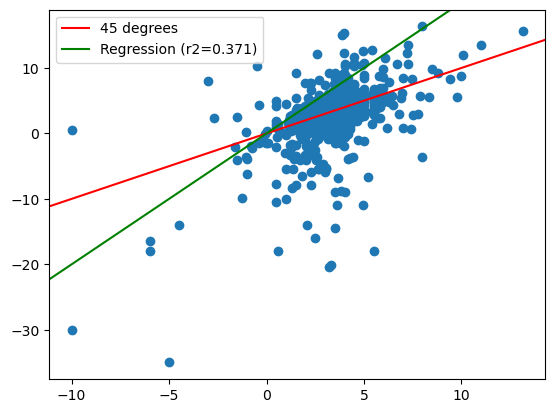

In [29]:
plt.scatter(X['expected_growth'], X['actual_growth'])
plt.axline([0, 0], [1, 1], color='red', label='45 degrees')
model = sm.OLS(X['actual_growth'], X['expected_growth'])
fitted_model = model.fit(cov_type='cluster', cov_kwds={'groups': groups})
x = np.arange(1, 3)
plt.axline(x, fitted_model.params.expected_growth * x, color='green', label=f'Regression (r2={fitted_model.rsquared:.3g})')
plt.legend(loc="upper left")
fitted_model.summary()

In [30]:
df[df['Country'] == 'Argentina'][['2008_in_2008', '2009_in_2008', '2009_in_2010', '2009_in_2009', '2010_in_2009', '2010_in_2011']]

,2008_in_2008,2009_in_2008,2009_in_2010,2009_in_2009,2010_in_2009,2010_in_2011
1,6.5,3.6,0.856,-2.523,1.5,9.161


In [31]:
X[(X['country_Argentina'] == 1) & (X['year_2009'] == 1)][['expected_growth', 'expected_growth_delta', 'actual_growth']]

,expected_growth,expected_growth_delta,actual_growth
117,3.6,-2.9,0.856


In [32]:
X[(X['country_Argentina'] == 1) & (X['year_2010'] == 1)][['expected_growth', 'expected_growth_delta', 'actual_growth']]

,expected_growth,expected_growth_delta,actual_growth
146,1.5,4.023,9.161


Argentina was in 2008 growing at 6.5% yearly. For 2009, the IMF predicted a growth of 3.6%, which is 2.9 percentage points lower, a slow down of the economy. The actual growth was 0.856% as measured in 2010, which confirms the slow down actually happened but to a faster speed.

In 2009, the economy was believed to be growing at 3.6%, the prediction for 2010 was a growth of 1.5%, while the actual growth was 9.161%.

In [33]:
y = X['actual_growth']
model = sm.OLS(y, sm.add_constant(X.drop(['actual_growth'], axis=1)))
fitted_model = model.fit(cov_type='cluster', cov_kwds={'groups': groups})
fitted_model.summary()

/home/seppo/.local/lib/python3.12/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 47, but rank is 19
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          actual_growth   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     87.73
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           5.09e-20
Time:                        21:51:34   Log-Likelihood:                -1322.7
No. Observations:                 522   AIC:                             2741.
Df Residuals:                     474   BIC:                             2946.
Df Model:                          47                                         
Covariance Type:              cluster                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      1.1184      0.530      2.109      0.035       0.079       2.158
year_2006                                  0.6273      0.414      1.515      0.130      -0.184       1.439
year_2007                                 -0.5663      0.541     -1.048      0.295      -1.626       0.493
year_2008                                 -2.0708      0.625     -3.313      0.001      -3.296      -0.846
year_2009                                 -6.5107      0.733     -8.877      0.000      -7.948      -5.073
year_2010                                  0.3827      0.795      0.481      0.630      -1.176       1.941
year_2011                                 -1.6442      0.653     -2.517      0.012      -2.925      -0.364
year_2012                                 -2.3335      0.598     -3.905      0.000      -3.505      -1.162
year_2013                                 -1.7408      0.466     -3.734      0.000      -2.655      -0.827
year_2014                                 -1.9634      0.467     -4.202      0.000      -2.879      -1.048
year_2015                                 -2.4634      0.399     -6.175      0.000      -3.245      -1.682
year_2016                                 -2.8618      0.621     -4.607      0.000      -4.079      -1.644
year_2017                                 -2.2024      0.585     -3.767      0.000      -3.348      -1.056
year_2018                                 -2.4087      0.625     -3.856      0.000      -3.633      -1.184
year_2019                                 -3.8135      0.852     -4.477      0.000      -5.483      -2.144
year_2020                                -13.2725      1.412     -9.401      0.000     -16.040     -10.505
year_2021                                  3.1490      2.295      1.372      0.170      -1.349       7.647
year_2022                                 -0.8516      0.597     -1.427      0.154      -2.021       0.318
country_Antigua and Barbuda                0.3793      0.159      2.384      0.017       0.067       0.691
country_Argentina                          1.9234      0.141     13.605      0.000       1.646       2.200
country_Barbados                          -0.7966      0.176     -4.535      0.000      -1.141      -0.452
country_Belize                             0.8088      0.012     68.858      0.000       0.786       0.832
country_Bolivia                            0.7468      0.275      2.714      0.007       0.207       1.286
country_Brazil                             0.2362      0.053      4.457      0.000       0.132       0.340
country_Chile                              0.3915      0.254      1.543      0.123      -0.106       0.889
country_Colombia                           1.2802      0.201      6.384      0.000     

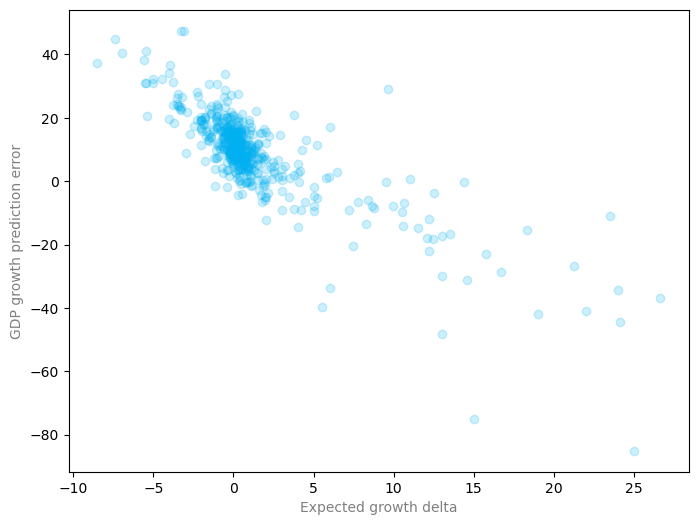

In [14]:
y_pred = fitted_model.predict(X)
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X['expected_growth_delta'], y - y_pred, color=COLORS[0], label='Observed', alpha=.2)
plt.xlabel('Expected growth delta', alpha=.5)
plt.ylabel('GDP growth prediction error', alpha=.5)

plt.show()